# Project: Kenyan Health Facilities Data Exploration and Cleaning
### Introduction
For my data engineering portfolio, I decided to work with a real-world dataset containing information about health facilities in Kenya. The dataset includes over 10,000 rows and covers various attributes such as facility codes, names, locations (province, county, district, division), type, ownership, and a series of service indicators (e.g., IPD, OPD, TB LABS, etc.).

#### Step 1: Loading and Exploring the Data
First, I loaded the Excel file into a pandas DataFrame using Python. I checked the first few rows to understand the structure and content of the data

I noticed that some columns, especially the service indicators, had many missing values (NaN). Also, some facilities had missing information in fields like Division, Sub Location, and Location.


In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("KenyaHealth-facilities.xlsx")
print(df.head())
print(df.info())



   Facility Code                                Facility Name     Province  \
0          19224                       CDF Kiriari Dispensary      Eastern   
1          19310   St Jude's Huruma Community Health Services      Nairobi   
2          14180                              10 Engineer VCT  Rift Valley   
3          17486                                 12 Engineers      Central   
4          18393                 3Kl Maternity & Nursing Home  Rift Valley   

     County       District       Division            Type  \
0      Embu       Manyatta       Manyatta      Dispensary   
1   Nairobi        Mathare         Huruma  Medical Clinic   
2  Laikipia  Laikipia East        Central      Dispensary   
3    Kiambu     Thika West            NaN      Dispensary   
4   Kajiado  Kajiado North  Ongata Rongai    Nursing Home   

                                 Owner Location Sub Location  ...  IPD OPD  \
0                   Ministry of Health   Ruguru       Ruguru  ...  NaN NaN   
1       

#### Step 2: Data Cleaning
To prepare the data for analysis, I performed several cleaning steps:

Removed duplicate rows to ensure each facility was unique.

Handled missing values: For critical fields like Facility Name and County, I filtered out rows with missing data. For service columns, I filled missing values with 0 (assuming the service is not offered if not recorded).

Standardized text fields: I converted all text to title case for consistency.

In [2]:

# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing key info
df = df.dropna(subset=['Facility Name', 'County'])

# Fill missing service indicators with 0
service_cols = ['IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']
df[service_cols] = df[service_cols].fillna(0)

# Standardize text columns
df['Facility Name'] = df['Facility Name'].str.title()
df['County'] = df['County'].str.title()


#### Step 3: Data Analysis
With the cleaned data, I explored several questions:

How many health facilities are there in each county?

What types of facilities are most common?

In [45]:
# Count facilities per county
facilities_per_county = df['County'].value_counts().sort_values(ascending=False)

print("Number of health facilities per county:")
print(facilities_per_county)

Number of health facilities per county:
County
Nairobi            942
Kiambu             506
Meru               461
Nyeri              453
Nakuru             436
Kitui              421
Machakos           374
Mombasa            320
Kajiado            313
Makueni            291
Murang'A           284
Kakamega           281
Kilifi             265
Kirinyaga          249
Homa Bay           239
Baringo            237
Migori             225
Kericho            210
Kisumu             207
Nandi              205
Uasin Gishu        194
Bungoma            185
Narok              179
Siaya              178
Embu               177
Turkana            171
Kisii              169
Garissa            165
Wajir              158
Trans Nzoia        155
Nyandarua          151
Bomet              143
Nyamira            140
Tharaka Nithi      133
Elgeyo Marakwet    133
West Pokot         132
Laikipia           124
Kwale              124
Busia              118
Marsabit           115
Samburu             97
Vihiga    

In [46]:
# Count facility types
facility_types = df['Type'].value_counts().sort_values(ascending=False)

print("Most common facility types:")
print(facility_types)

Most common facility types:
Type
Dispensary                                      4820
Medical Clinic                                  3360
Health Centre                                   1126
Other Hospital                                   256
Nursing Home                                     208
VCT Centre (Stand-Alone)                         181
Sub-District Hospital                            143
District Hospital                                141
Laboratory (Stand-alone)                          59
Maternity Home                                    49
Medical Centre                                    36
Dental Clinic                                     30
Not in List                                       19
Health Programme                                  15
Eye Centre                                        10
Radiology Unit                                     9
Provincial General Hospital                        9
Health Project                                     9
Training Inst

In [50]:
print("Top 10 counties by number of health facilities:")
print(facilities_per_county.head(10))

print("\nTop 10 most common facility types:")
print(facility_types.head(10))

print("\nTop 10 counties by facilities offering TB diagnosis:")
print(tb_diag_county.head(10))

Top 10 counties by number of health facilities:
County
Nairobi     942
Kiambu      506
Meru        461
Nyeri       453
Nakuru      436
Kitui       421
Machakos    374
Mombasa     320
Kajiado     313
Makueni     291
Name: count, dtype: int64

Top 10 most common facility types:
Type
Dispensary                  4820
Medical Clinic              3360
Health Centre               1126
Other Hospital               256
Nursing Home                 208
VCT Centre (Stand-Alone)     181
Sub-District Hospital        143
District Hospital            141
Laboratory (Stand-alone)      59
Maternity Home                49
Name: count, dtype: int64

Top 10 counties by facilities offering TB diagnosis:
Series([], Name: count, dtype: int64)


#### Step 4: Visualization
I visualized the distribution of facility types and the number of facilities per county using matplotlib:

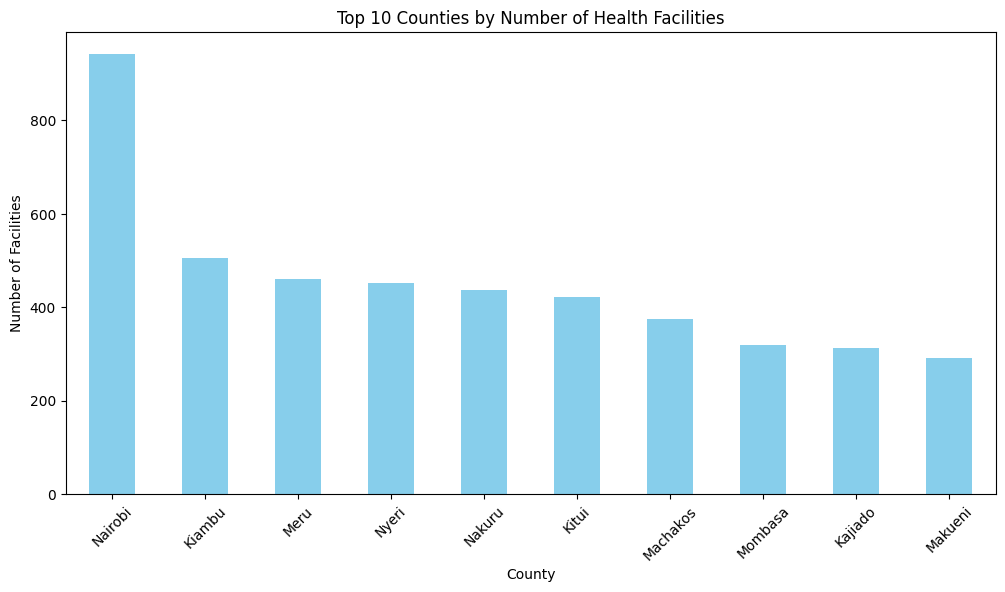

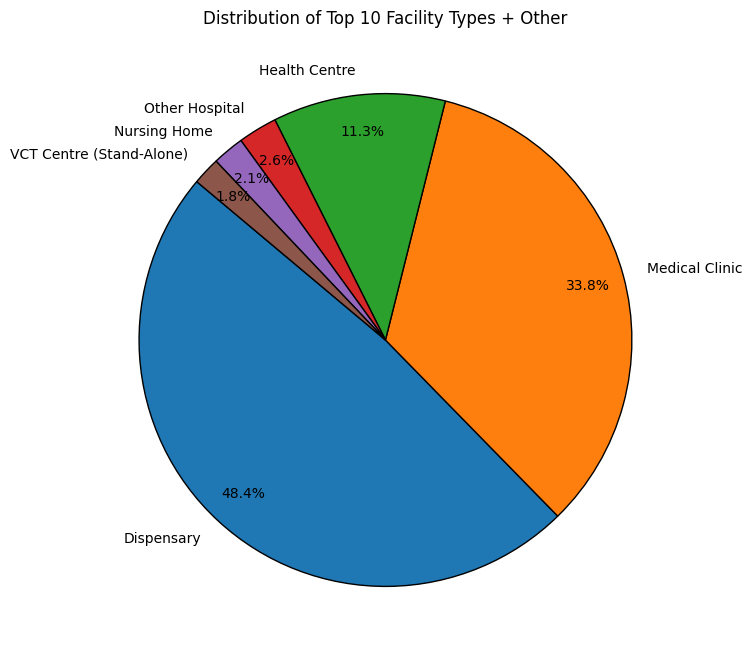

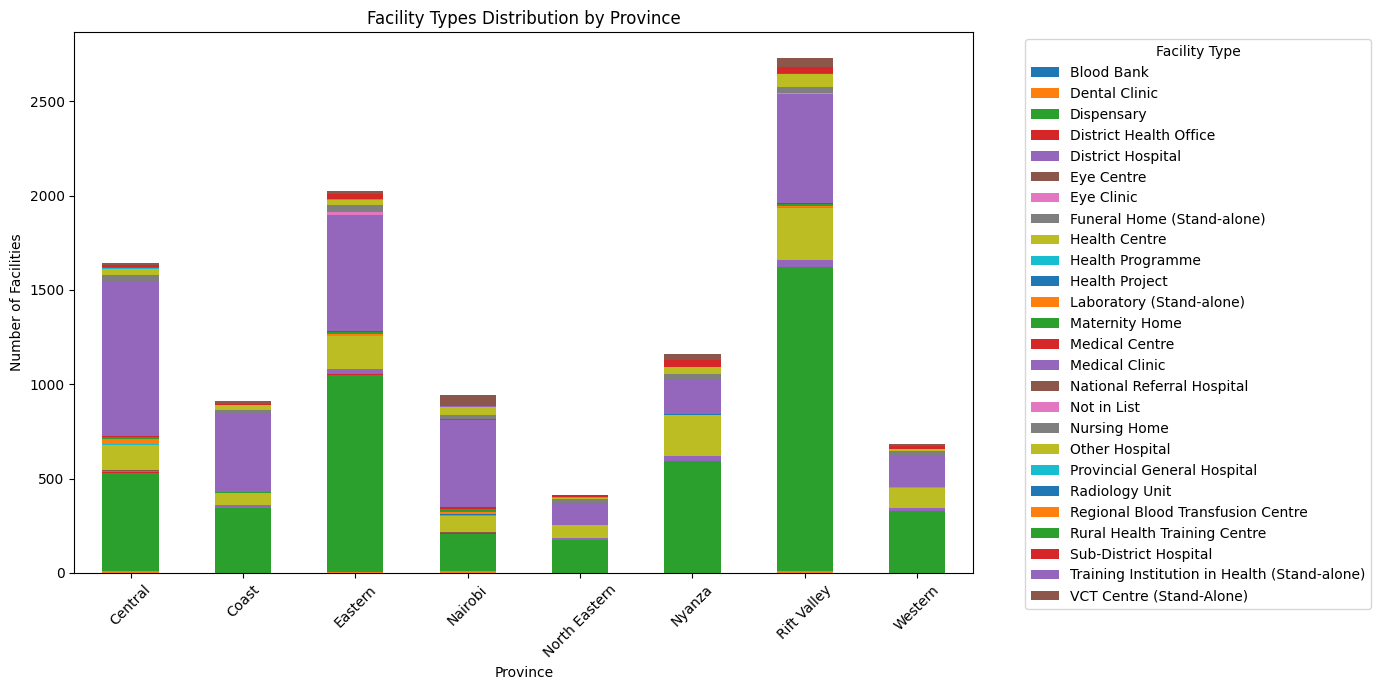

In [34]:
import matplotlib.pyplot as plt
# Plot facilities per county
top_counties = df['County'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_counties.plot(kind='bar', color='skyblue')
plt.title('Top 10 Counties by Number of Health Facilities')
plt.xlabel('County')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)
plt.show()

# Plot facility types
top_06 = facility_types.nlargest(6)
facility_types_top = pd.concat([top_06])

plt.figure(figsize=(8,8))
facility_types_top.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.1,
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel('')
plt.title('Distribution of Top 10 Facility Types + Other')
plt.show()

# Plot facility types by county
pivot = df.pivot_table(index='Province', columns='Type', aggfunc='size', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Facility Types Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()






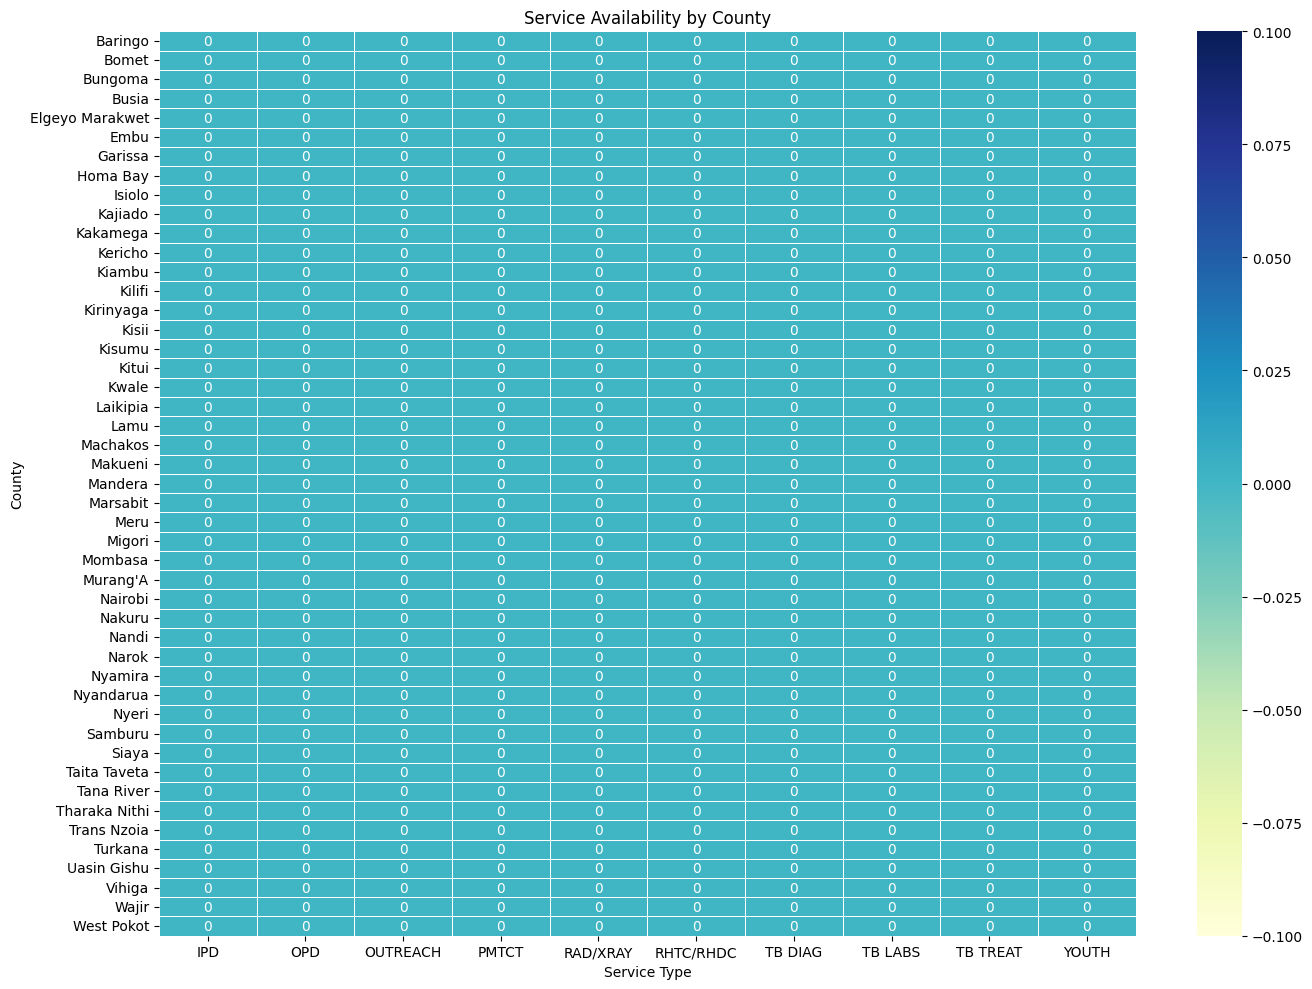

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of service columns to include in heatmap
service_cols = ['IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']

# Convert service columns to numeric, coerce errors to NaN
for col in service_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaNs with 0 (assume missing means service not offered)
df[service_cols] = df[service_cols].fillna(0)

# Group by County and sum service counts
service_by_county = df.groupby('County')[service_cols].sum()

# Optional: sort counties by total services for better visualization
service_by_county['Total'] = service_by_county.sum(axis=1)
service_by_county = service_by_county.sort_values('Total', ascending=False).drop(columns='Total')

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(service_by_county, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Service Availability by County')
plt.xlabel('Service Type')
plt.ylabel('County')
plt.tight_layout()
plt.show()


### *Step 5: Documentation and Insights*

In this project, I analyzed a large dataset of Kenyan health facilities, which includes over 10,000 records with attributes such as facility codes, names, locations, types, ownership, and a variety of service indicators (e.g., IPD, OPD, TB LABS).

The goal was to clean and explore the data to gain insights into the distribution of health facilities by county, type, and service availability, and to visualize these patterns effectively.

Data Cleaning and Preparation
- Handling Missing Values: Many service indicator columns had missing values (NaN), which I replaced with zeros to indicate absence of the service.
- Standardizing Text: I converted key text columns (e.g., Facility Name, County) to title case for consistency.
- Removing Duplicates: Duplicate rows were removed to ensure unique facility entries.
- Data Types: Some columns had mixed data types (strings and numbers), especially the service indicator columns, which caused problems during visualization.

*Insights from the Data*
1. The majority of health facilities are dispensaries, with a smaller number of clinics, hospitals, and nursing homes.
2. Nairobi and Kiambu counties have the highest number of facilities, reflecting urban concentration.
3. Service availability varies widely; for example, TB diagnostic services are concentrated in certain counties.
4. Data quality issues such as missing or inconsistent entries highlight the need for improved data collection.

>> Visualizations
- Bar charts show the top counties by number of facilities.
- Pie charts illustrate the distribution of facility types, focusing on the top 10 categories with others grouped.
- Heatmaps visualize service availability by county, highlighting regional differences.

#### Step 6: Next Steps
Build a dashboard (using Power BI or Tableau) for interactive exploration.
Automate the data cleaning process with a Python script.
Load the cleaned data into a SQL database and practice writing queries for more advanced analytics.

Conclusion
This project helped me practice essential data engineering and data analysis skills, including data cleaning, transformation, and visualization. It also gave me a better understanding of the health facility landscape in Kenya and the challenges of working with real-world data.

#####  >> If you need the actual code or want to see my Jupyter Notebook, feel free to check my GitHub portfolio or contact me!🫰🏾

>
>I can use this data to analyze facility distribution across regions in my project
>
>I will leverage the facility details to identify healthcare gaps in different districts
>
>This dataset helps me understand the ownership and type of health facilities for planning
>
>I plan to use the location info to map healthcare access points in my community
>
>The service indicators like IPD, OPD, and outreach will guide resource allocation strategies
>
*Prepared by: Michelle Wambaya, 7th July 2025*


In [55]:
# If your DataFrame is named df_final (adjust as needed)
df.to_csv('KenyaHealth-facilities', index=False)
